Jupyter Notebook for AI_Weeder by Nicolai Bledow


In [27]:
import os

print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/nico/code/dorwein/ai_weeder


In [28]:
import os

# Change the working directory to the project's root
os.chdir('/home/nico/code/dorwein/ai_weeder')

# Confirm the change
print("New Working Directory:", os.getcwd())

New Working Directory: /home/nico/code/dorwein/ai_weeder


In [29]:
import os

print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/nico/code/dorwein/ai_weeder


In [30]:
import tensorflow as tf

# Absolute path to the directory containing the images
main_dir = '/home/nico/code/dorwein/ai_weeder/raw_data/nonsegmentedv2'

# Define image size and batch size
img_height, img_width = 128, 128
batch_size = 32

# Load dataset and split into training and validation sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    main_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    main_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Check class names
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

Found 4958 files belonging to 12 classes.
Using 3967 files for training.
Found 4958 files belonging to 12 classes.
Using 991 files for validation.
Class names: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [31]:
# Check some properties of the dataset
for images, labels in train_dataset.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

Images shape: (32, 128, 128, 3)
Labels shape: (32,)


2024-09-04 13:36:09.165370: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


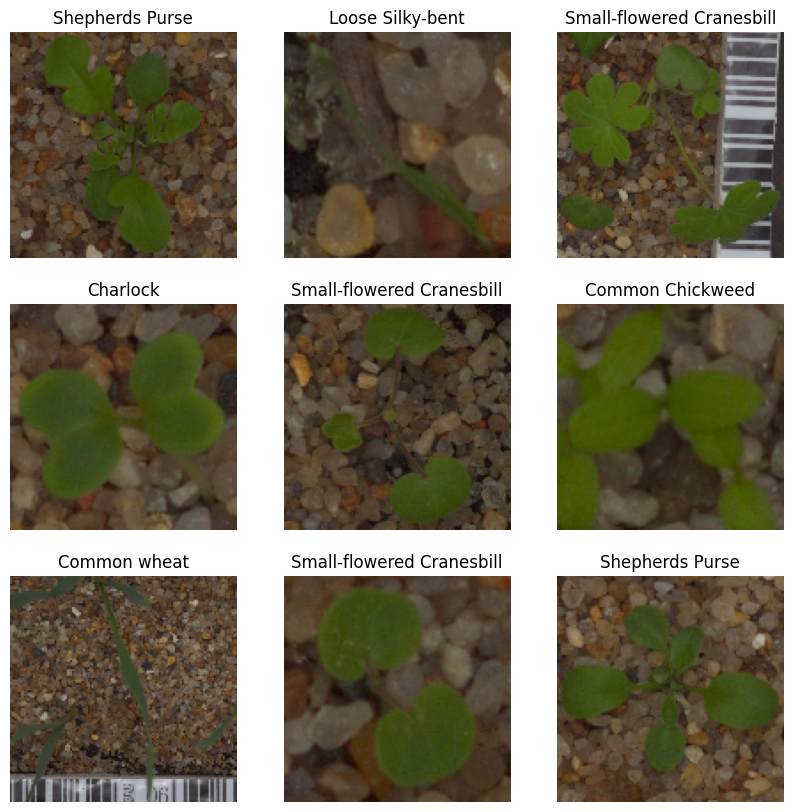

In [32]:
import matplotlib.pyplot as plt

# Plotting some examples from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

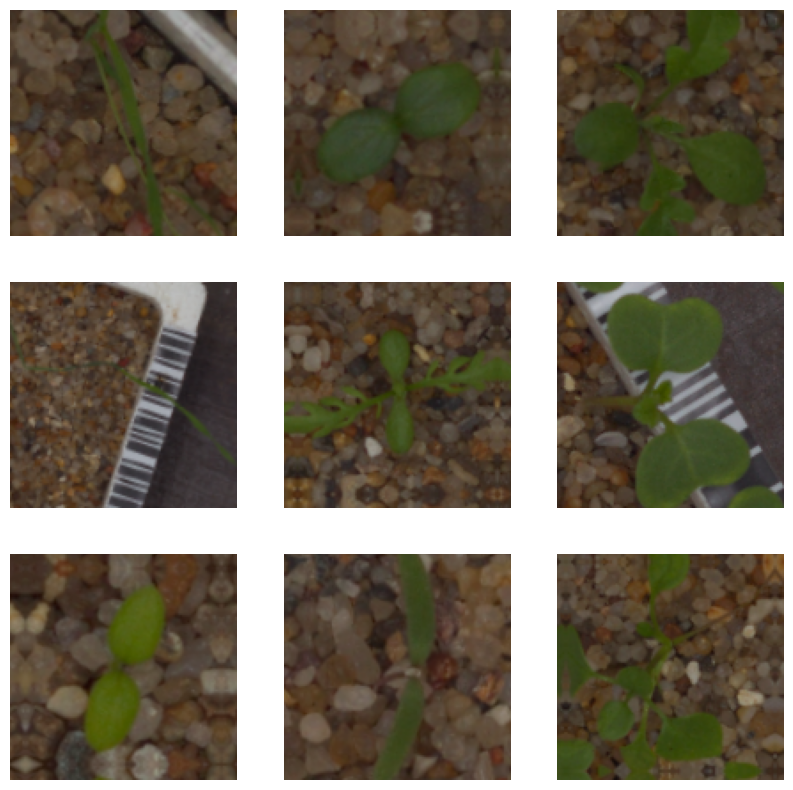

In [33]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Applying data augmentation and showing an example
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

In [34]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Input layer and first convolutional block
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the 3D feature maps to 1D feature vectors
    model.add(layers.Flatten())

    # Fully connected layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization

    # Output layer with softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set input shape and number of classes
input_shape = (128, 128, 3)
num_classes = 12

# Create the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model architecture
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,228 (16.36 MB)

 Trainable params: 4,289,228 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Number of epochs to train the model
epochs = 30

# Train the CNN model
history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    verbose=1
)


Epoch 1/30


124/124 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - accuracy: 0.1965 - loss: 2.3795 - val_accuracy: 0.4460 - val_loss: 1.7512
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.3794 - loss: 1.7819 - val_accuracy: 0.5721 - val_loss: 1.3362
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.5032 - loss: 1.4666 - val_accuracy: 0.6559 - val_loss: 1.0648
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.5802 - loss: 1.2099 - val_accuracy: 0.6842 - val_loss: 0.9305
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.6302 - loss: 1.0779 - val_accuracy: 0.7296 - val_loss: 0.8300
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.6719 - loss: 0.9576 - val_accuracy: 0.7316 - val_loss: 0.7946
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.7064 - loss: 0.8678 - val_accuracy: 0.7568 - val_loss: 0.7283
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.7420 - loss: 0.7725 - val

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8050 - loss: 0.7959
Validation Loss: 0.7915247082710266
Validation Accuracy: 0.8193743824958801


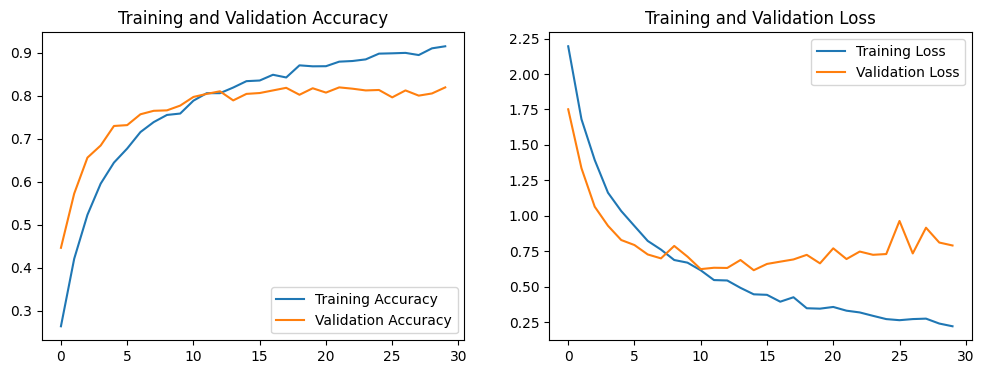

In [37]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = cnn_model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
